# Trabalho Não Supervisionado - Disciplina INF - 121

## Banco de dados utilizado : Intercâmbio

### Elaboração do Colab e do trabalho não supervisionado : Rafael Garcia



---


O objetivo do trabalho é investigar como se dá a relação entre o destino dos alunos e qual centro de ciência o aluno faz parte. Por exemplo: espera-se que alunos do centro de ciências exatas sejam mais propensos a realizarem um intercâmbio na Alemanha do que na América do Sul.

**Variáveis utilizada: Países e Centros de Ciência.**

**O dataframe principal é o X**

## Análise Exploratória
Na análise exploratória, vê-se que os EUA é o país mais visitado pelos intercambistas da UFV, tanto em termos absolutos quanto relativos. Outros países muito visitados são a Alemanha, França, Hungria e Portugal (absolutos).




#  Controle do Trabalho - Itens requisitados na ementa

1. Cada grupo deve selecionar um dataset e registrar na planilha de controle; FEITO

2. Realizar uma análise exploratória dos dados e limpeza, se necessário; FEITO

3. Elaborar uma proposta preliminar (esboço da análise planejada) para apresentar;

4. Uma vez os dados agrupados, podemos aplicar técnicas para buscar
explicabilidade. Uma solução é usar árvores de decisão, onde poderemos observar a ordem das perguntas da raiz em direção às folhas para compreender como os dados foram organizados em grupos. Após a etapa de agrupamento, executar uma Árvore de Decisão sobre os clusters formados, apresentando:

* A estrutura da árvore; FEITO

* As variáveis mais importantes e discutir quais as possíveis interpretações que podemos fazer para explicar os agrupamentos. FEITO


5. Descrever todo o processo no relatório e apresentar os melhores resultados no
pôster.

6. Deverá haver um Google Colab com os experimentos realizados. FEITO


# PLANO DE AÇÃO


* Parte 1
1.   Puxar o dataset;
2.   Remover as observações dos campi de Rio Paranaíba e Florestal; FEITO
3.   Adicionar a variável Centro de Ciência (CCi); FEITO
5.   Adicionar a variável Continente; FEITO
* Parte 2
5. Realizar o one-hot encoding (os dados são discretos); FEITO
6. Plotar um gráfico de duas dimensões e verificar o padrão existente (a análise exploratória); FEITO

* Parte 3

7. Aplicação do K-means com esses dados; FEITO
8. Como são muitos países, pode ser necessário realizar uma redução de dimensionalidade para simplificar a análise. Aplicarei também o K-Means após o PCA; FEITO

9. Aplicar o DBSCAN no PCA; FEITO

10. Explicabilidade do modelo;

* Parte 4

11. Nesta parte vi que não seria possível abordar o problema de pesquisa de maneira "direta", muitas dimensões.

* Parte 5

12. Apliquei a redução de dimensionalidade e fiz alguns testes para o KMeans, rodei diversos modelos para vários valores de k. Cheguei a conclusão de que o melhor valor de K era 6. Como não custava nada fazer um DBSCAN também, aproveitei e fiz alguns testes com ele, porém, preferi a classificação do K-Means.

---

Observação: No final desta parte percebi que era possível remover os outliers e ficar com apenas k=6. Apenas retirei os outliers (2 clusters) e não rodei outro modelo com k = 4. Por essa razão, no código e nas figuras vocês verão k = 6 e apenas 4 clusters. ESSE É O MOTIVO.
Como o código estava rodando certo e sem problemas não quis mexer nele.

---

* Parte 6

13. Nesta parte eu busquei conferir "explicabilidade" ao modelo com uma árvore de decisão e uma análise da variância explicada pelos dois PCA's. FEITO


# Parte 1 - Importação dos dados e bibliotecas pertinentes

In [286]:
# @title Imports necessários

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps

from sklearn.cluster import DBSCAN, KMeans
from sklearn import tree
from sklearn.tree import plot_tree, DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, silhouette_score, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split



In [287]:
# @title Extração de dados e limpeza seguindo os protocolos do plano de ação
itbm = pd.read_csv("/content/alunos-intercambios - alunos-intercambios.csv")
#itbm.head()

In [288]:
# @title Remoção de algumas coisinhas
# Removendo observações com CAF e CRP.
itbm = itbm.drop(itbm[itbm['Campus'] == 'CAF'].index)
itbm = itbm.drop(itbm[itbm['Campus'] == 'CRP'].index)
#itbm.head()

# A análise se concentra apenas nos estudantes que saíram da UFV e foram para outra
# universidade. Não estamos analaisando aqueles que vieram por causa de intercâmbio.
# Por essa razão, é preciso remover as observações com "Entrada".
# Como a coluna que contém os códigos de cada estudante não é necessária,
# optou-se por removê-la.

itbm = itbm.drop(itbm[itbm['Mobilidade_Tipo'] == 'Entrada'].index)
itbm = itbm.drop(columns="CodigoEstudante")

#itbm.head()
## O dataset deve conter 2765 linhas após a remoção dos outros campi
len(itbm)

2765

In [289]:
# @title Mapeamento países e Continentes
# Questão dos continetes e dos países
países = pd.Series(itbm["Pais"]).value_counts()
# Como alguns países possuem poucas observações iremos criar uma variável chamada "Continente".
# Assim, poderemos comparar qual variável apresentou melhor resultado.
len(países)

mapeamento_continente = {
    'Estados Unidos': 'América do Norte',
    'França': 'Europa',
    'Portugal': 'Europa',
    'Brasil': 'América do Sul',
    'Espanha': 'Europa',
    'Alemanha': 'Europa',
    'Itália': 'Europa',
    'Colômbia': 'América do Sul',
    'Austrália': 'Oceania',
    'Hungria': 'Europa',
    'Inglaterra': 'Europa',
    'Holanda': 'Europa',
    'Canadá': 'América do Norte',
    'Irlanda Do Norte': 'Europa',
    'Argentina': 'América do Sul',
    'México': 'América do Norte',
    'Bélgica': 'Europa',
    'Costa Rica': 'América Central',
    'Equador': 'América do Sul',
    'Áustria': 'Europa',
    'Japão': 'Ásia',
    'Chile': 'América do Sul',
    'Uruguai': 'América do Sul',
    'Peru': 'América do Sul',
    'China': 'Ásia',
    'Coréia Do Sul': 'Ásia',
    'Venezuela': 'América do Sul',
    'Paraguai': 'América do Sul',
    'Bolívia': 'América do Sul',
    'Polônia': 'Europa',
    'Rússia': 'Europa',
    'Finlândia': 'Europa',
    'Índia': 'Ásia',
    'Irlanda': 'Europa',
    'República Tcheca': 'Europa',
    'Indonésia': 'Ásia',
    'Dinamarca': 'Europa',
    'Suécia': 'Europa',
    'Nigéria': 'África',
    'África do Sul': 'África'
}

# Adicionando no dataset original
itbm['Continente'] = itbm['Pais'].map(mapeamento_continente)

#itbm[['Pais', 'Continente']].head()

In [290]:
# @title Mapeamento cursos e centros
# Questão dos cursos e centros de ciências
# Mapeamento de cursos para os Centros de Ciência (CCi)

cursos = pd.Series(itbm["Curso"]).value_counts()
cursos

mapeamento_cci = {
    # CCA (Ciências Agrárias)
    'Agronomia': 'CCA',
    'Engenharia Florestal': 'CCA',
    'Engenharia Agrícola e Ambiental': 'CCA',
    'Zootecnia': 'CCA',
    'Gestão do Agronegócio': 'CCA',
    'Agronegócio': 'CCA',
    'Ciências Econômicas - Ênfase em Agronegócio': 'CCA',


    # CCB (Ciências Biológicas e da Saúde)
    'Ciências Biológicas': 'CCB',
    'Medicina Veterinária': 'CCB',
    'Bioquímica': 'CCB',
    'Licenciatura em Ciências Biológicas': 'CCB',
    'Enfermagem': 'CCB',
    'Nutrição': 'CCB',
    'Medicina': 'CCB',
    'Educação Física': 'CCB',
    'Bacharelado em Educação Física': 'CCB',

    # CCE (Ciências Exatas e Tecnológicas)
    'Engenharia de Alimentos': 'CCE',
    'Engenharia Química': 'CCE',
    'Engenharia Civil': 'CCE',
    'Arquitetura e Urbanismo': 'CCE',
    'Engenharia de Produção': 'CCE',
    'Engenharia Ambiental': 'CCE',
    'Engenharia Mecânica': 'CCE',
    'Engenharia Elétrica': 'CCE',
    'Química': 'CCE',
    'Ciência da Computação': 'CCE',
    'Engenharia de Agrimensura e Cartográfica': 'CCE',
    'Física': 'CCE',
    'Matemática': 'CCE',
    'Ciência e Tecnologia de Laticínios': 'CCE',
    'Licenciatura em Química': 'CCE',
    'Licenciatura em Matemática': 'CCE',
    'Engenharia de Agrimensura': 'CCE',

    # CCH (Ciências Humanas e Sociais Aplicadas)
    'Economia Doméstica': 'CCH',
    'Administração': 'CCH',
    'Letras': 'CCH',
    'Direito': 'CCH',
    'Comunicação Social': 'CCH',
    'Ciências Econômicas': 'CCH',
    'Secretariado Executivo Trilíngue, Português, Francês, Inglês': 'CCH',
    'Geografia': 'CCH',
    'Ciências Sociais': 'CCH',
    'História': 'CCH',
    'Ciências Contábeis': 'CCH',
    'Pedagogia': 'CCH',
    'Cooperativismo': 'CCH',
    'Gestão de Cooperativas': 'CCH',
    'Ciências Econômicas - Ênfase em Economia': 'CCH',
    'Dança': 'CCH',
    'Serviço Social': 'CCH',
    'Administração - Habilitação em Administração de Cooperativas': 'CCH'
}

itbm['CC'] = itbm['Curso'].map(mapeamento_cci)

#print(itbm[['Curso', 'CC']].head())
#cursos_nao_mapeados = itbm[itbm['CC'] == 'Outro Centro']['Curso'].unique()

In [291]:
# @title Limpando os NA's

# Como a base de dados está completamente configurada para o estudo, podemos remover os NaN's
itbm = itbm.dropna(subset=["Pais","Curso","Continente", "CC"])
len(itbm)

1936

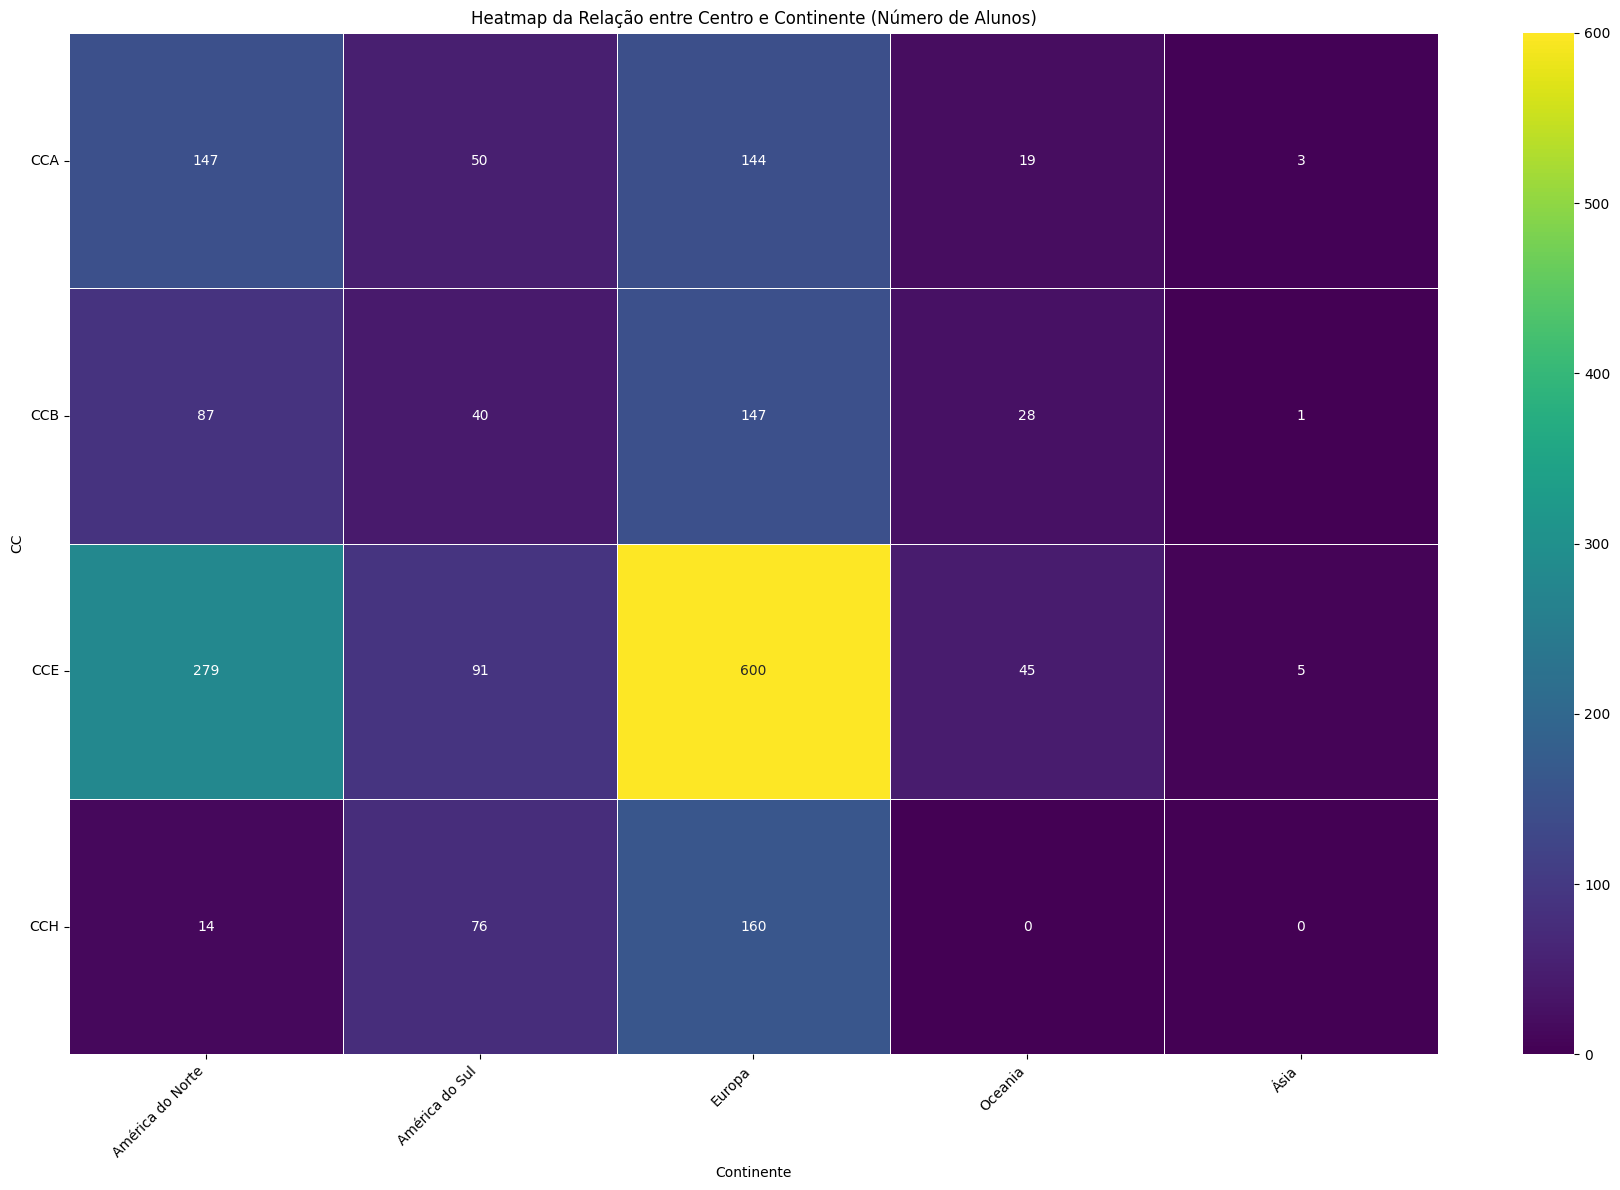

Total de alunos CCA: 363
Total de alunos CCB: 303
Total de alunos CCE: 1020 
Total de alunos CCH: 250


In [292]:
# @title Gráfico: Centro de Ciência e Continente - Análise mais "superficial"
# Preparar os dados: contar a ocorrência de cada combinação de Centro de Ciência e Continente

heatmap_data_CC_Continente = itbm.groupby(['CC', 'Continente']).size().unstack(fill_value=0)
plt.figure(figsize=(18, 12))
sns.heatmap(
    heatmap_data_CC_Continente,
    annot=True,      # Mostrar os valores numéricos nas células
    fmt='d',         # Formatar os números como inteiros
    cmap='viridis',
    linewidths=.5,   # Linhas entre as células
    linecolor='white' # Cor das linhas
)

plt.title('Heatmap da Relação entre Centro e Continente (Número de Alunos)')
plt.xlabel('Continente')
plt.ylabel('CC')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Calculando as proporções
total_CCA = sum(itbm["CC"] == "CCA")
total_CCB = sum(itbm["CC"] == "CCB")
total_CCE = sum(itbm["CC"] == "CCE")
total_CCH = sum(itbm["CC"] == "CCH")

print("Total de alunos CCA: %d" % total_CCA)
print("Total de alunos CCB: %d" % total_CCB)
print("Total de alunos CCE: %d " % total_CCE)
print("Total de alunos CCH: %d"% total_CCH)


#prop_Europa_CCA = /total_CCA
#prop_Europa_CCB
#prop_Europa_CCE = sum(itbm["Continente"] == "Europa")/total_CCE
#prop_Europa_CCH

# Parte 2 - Análise Exploratória

Como os dados são "discretos", é preciso realizar o one hot encoding para aplicar os métodos não supervisionados.

In [293]:
# @title Verificando se há NA's na amostra. Passo anterior a realizção do one hot enconding

## Não rodar essa célula mais de uma vez

# Variáveis desejadas: Curso, País, Continente e Centro de Ciência
itbm_verificado = itbm[["Curso", "Pais", "Continente", "CC"]]

itbm_verificado = itbm_verificado.isna()

for i in ("Curso", "Pais", "Continente", "CC"):
  a = itbm_verificado[i].unique()
  print(f" Há NA's em {i} : {a}" )

# No momento, as saídas foram apenas [False], logo não há NA's na amostra.
# Assim, pode-se remover as colunas desncessárias

itbm = itbm[["Curso", "Pais", "Continente", "CC"]]

enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
itbm_enc = enc.fit_transform(itbm[["Pais"]])

# Concatenando os dois dataset
itbm = pd.concat([itbm, itbm_enc], axis = 1).drop(columns = ['Pais'])

del itbm_verificado,i,a, itbm_enc

 Há NA's em Curso : [False]
 Há NA's em Pais : [False]
 Há NA's em Continente : [False]
 Há NA's em CC : [False]


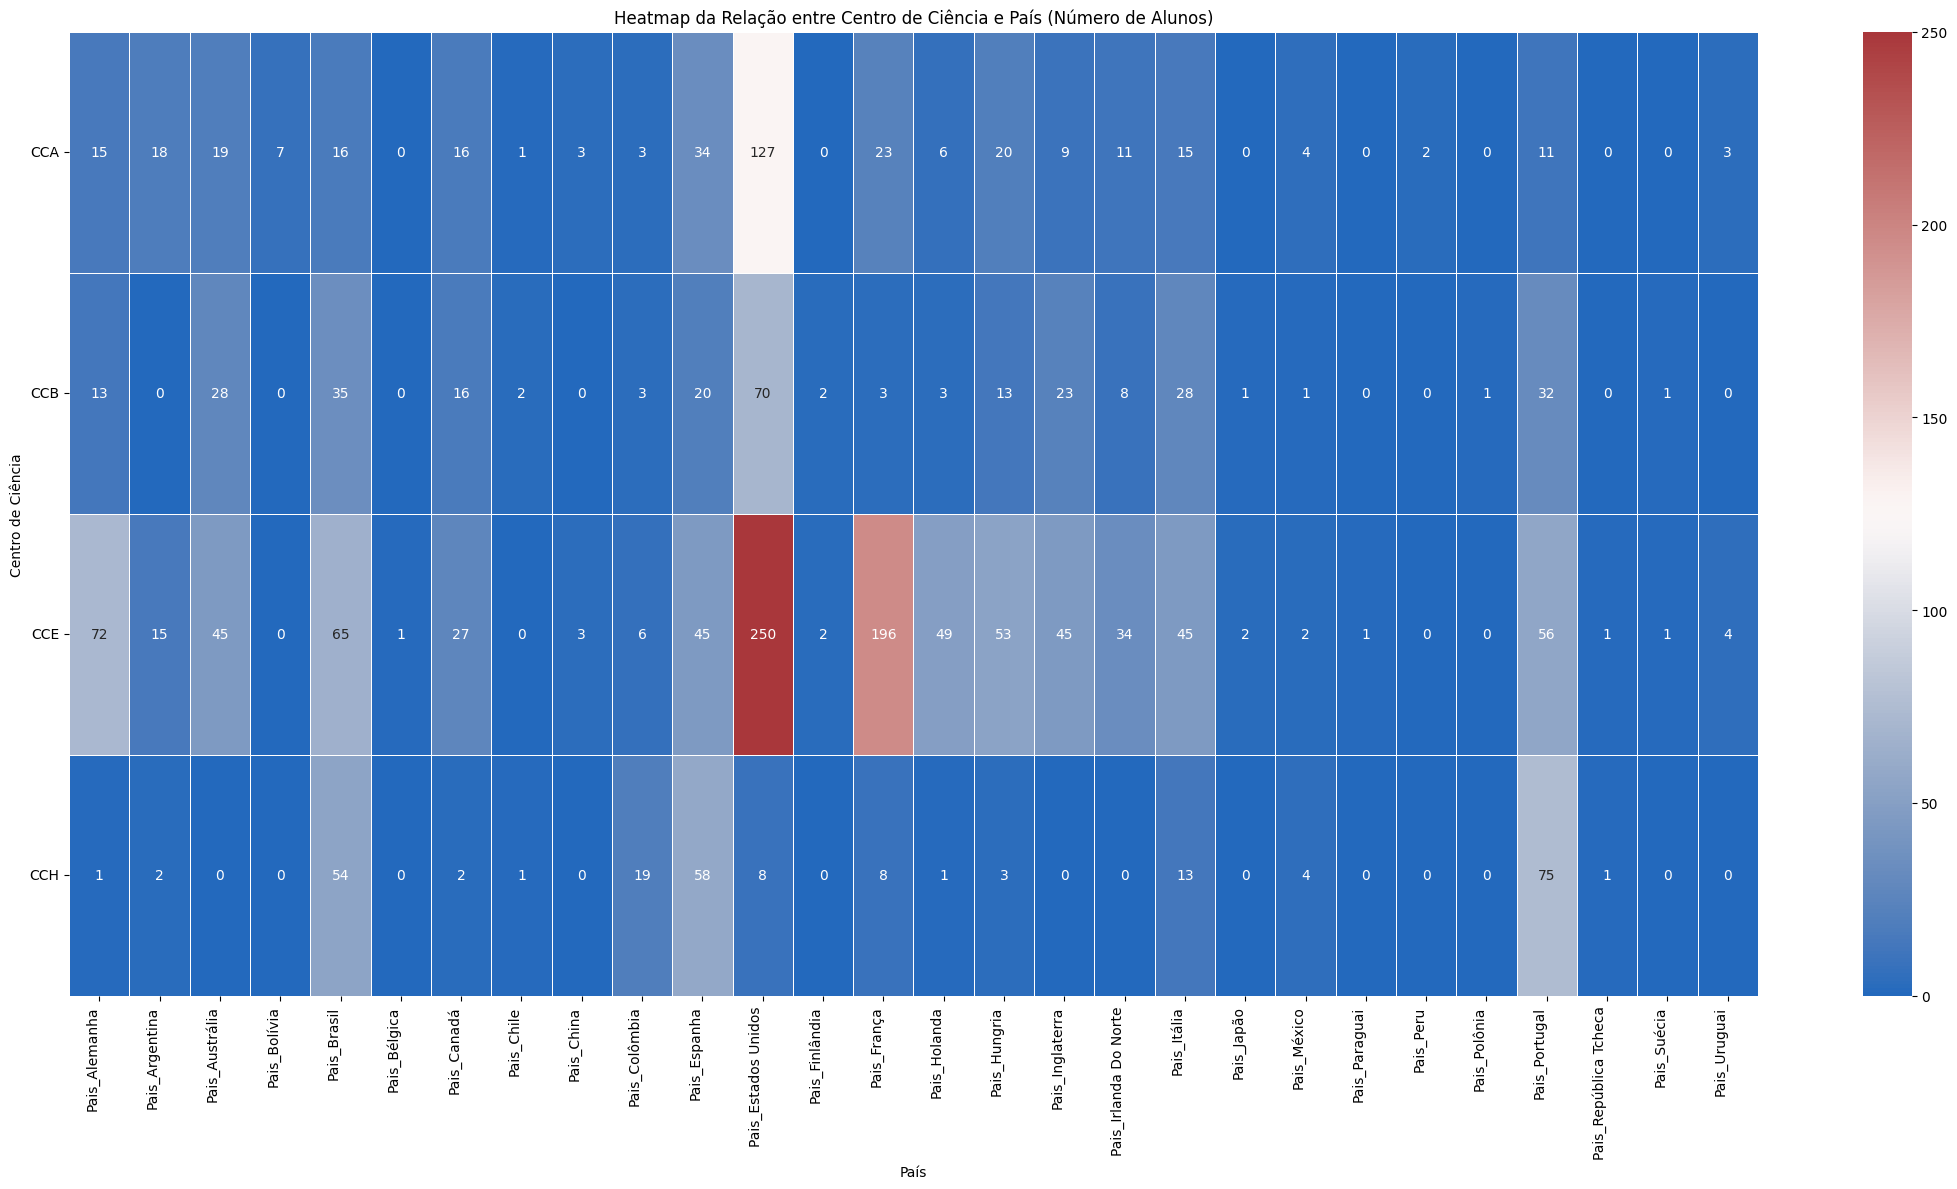

In [294]:
# @title Visualização dos intercâmbios "dados absolutos"
# Identificar as colunas de países que foram one-hot encoded
country_cols = [col for col in itbm.columns if col.startswith('Pais_')]

# Agrupar por Centro de Ciência (CC) e somar as ocorrências de cada país
heatmap_data_CC_Pais = itbm.groupby('CC')[country_cols].sum()

plt.figure(figsize=(22, 12))
# Criar o heatmap
sns.heatmap(
    heatmap_data_CC_Pais,
    annot=True,      # Mostrar os valores numéricos nas células
    fmt='.0f',         # Formatar os números como floats sem casas decimais (efetivamente inteiros)
    cmap='vlag',  # Escolha um mapa de cores
    linewidths=.5,   # Linhas entre as células
    linecolor='white' # Cor das linhas
)

plt.title('Heatmap da Relação entre Centro de Ciência e País (Número de Alunos)')
plt.xlabel('País')
plt.ylabel('Centro de Ciência')
plt.xticks(rotation=90, ha='right') # Rotacionar os rótulos do eixo X para melhor legibilidade
plt.yticks(rotation=0)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.savefig('heatmap_pais_cc-abs.png', dpi=300)
plt.show()

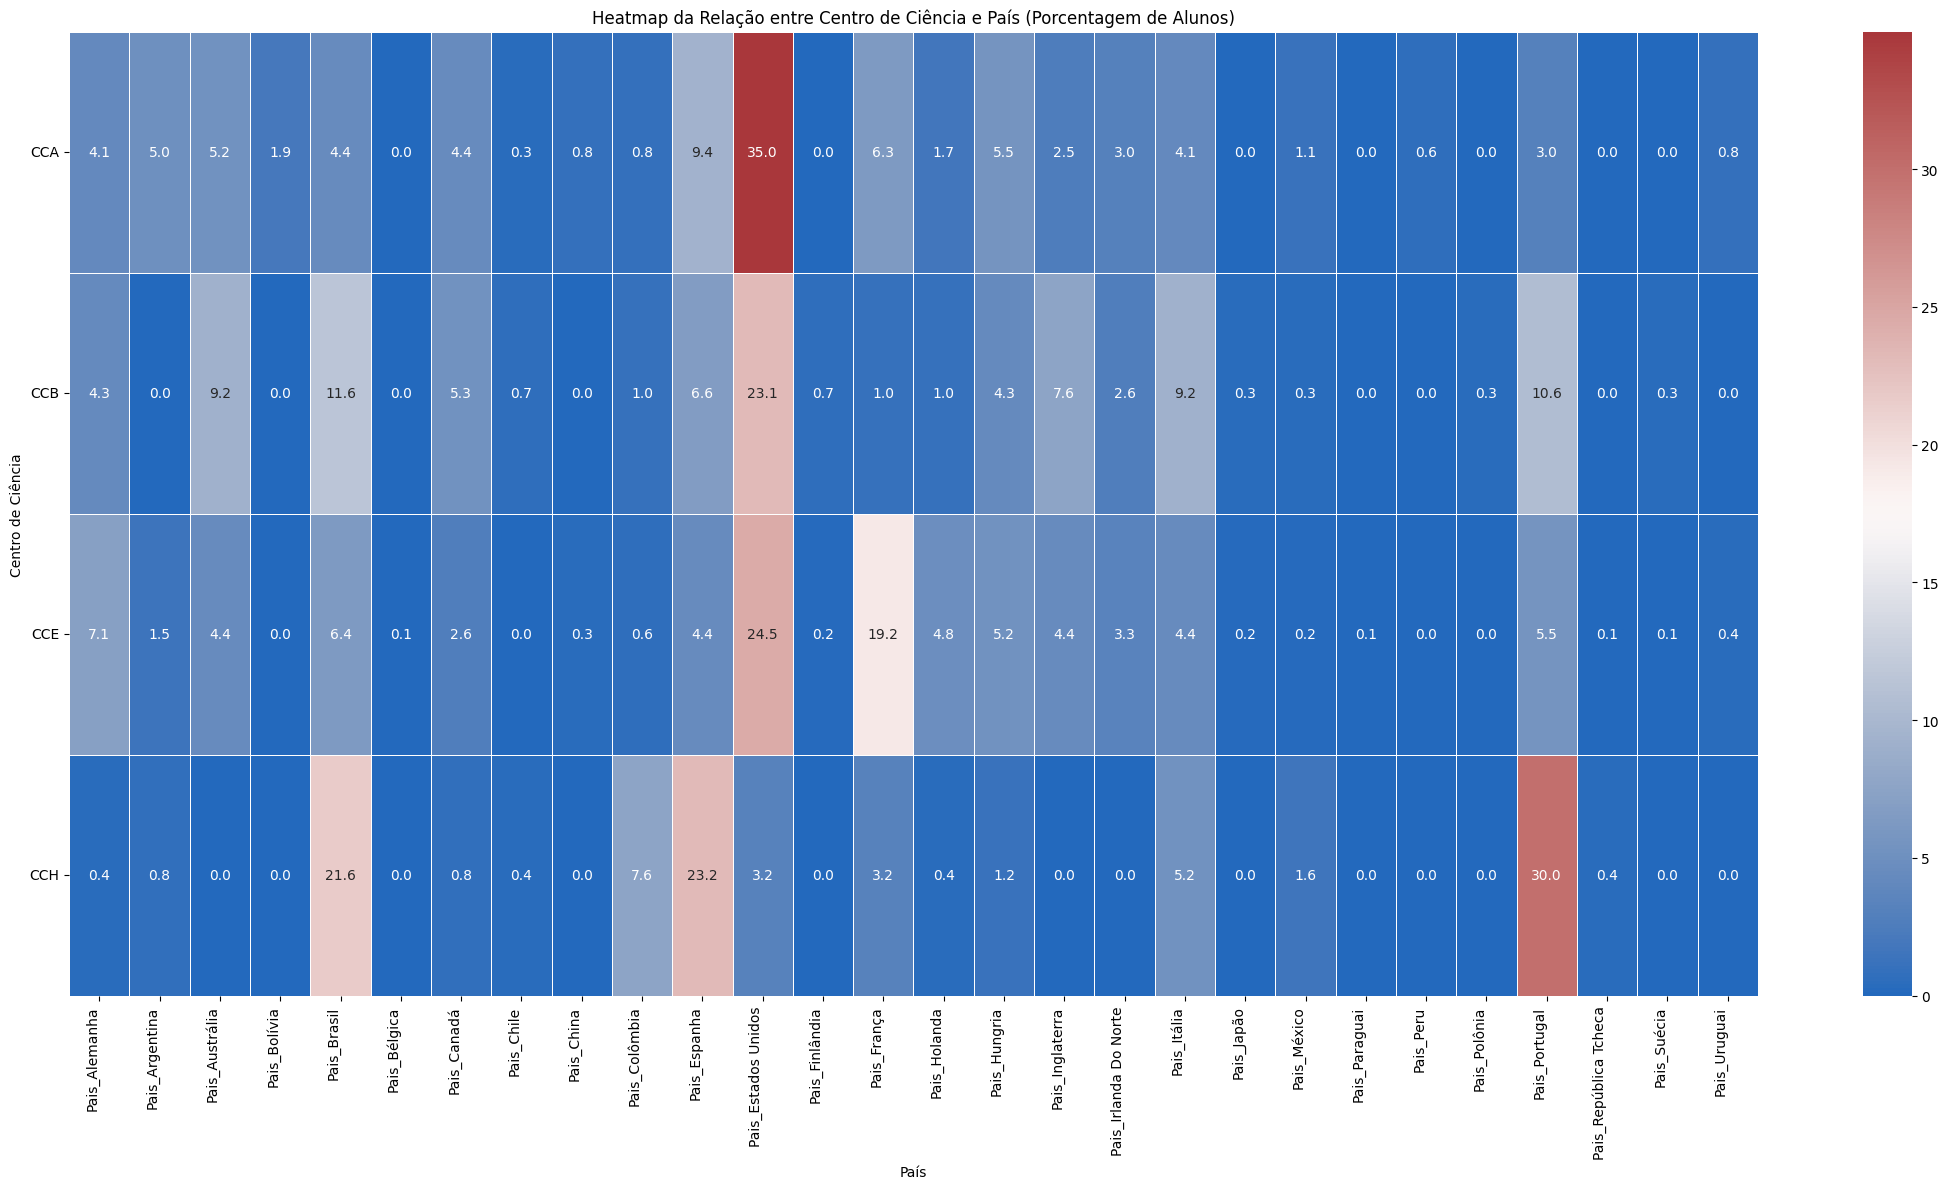

In [295]:
# @title Visualização dos intercâmbios "dados relativos"

country_cols = [col for col in itbm.columns if col.startswith('Pais_')]
heatmap_data_CC_Pais = itbm.groupby('CC')[country_cols].sum()
# Adicionando um pequeno valor para evitar divisão por zero
total_students_per_cc = heatmap_data_CC_Pais.sum(axis=1) + 1e-6
heatmap_data_CC_Pais_percent = (heatmap_data_CC_Pais.div(total_students_per_cc, axis=0) * 100)
plt.figure(figsize=(22, 12))

sns.heatmap(
    heatmap_data_CC_Pais_percent,
    annot=True,      # Mostrar os valores numéricos nas células
    fmt='.1f',       # Formatar os números com uma casa decimal
    cmap='vlag',  # Escolha um mapa de cores
    linewidths=.5,   # Linhas entre as células
    linecolor='white' # Cor das linhas
)

plt.title('Heatmap da Relação entre Centro de Ciência e País (Porcentagem de Alunos)')
plt.xlabel('País')
plt.ylabel('Centro de Ciência')
plt.xticks(rotation=90, ha='right') # Rotacionar os rótulos do eixo X
plt.yticks(rotation=0)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.savefig('heatmap_pais_cc.png', dpi=300)
plt.show()

# Parte 3 Aplicação do K-Means
Para o K-Means funcionar, é preciso aplicar o One-Hot ecndong nas outras variáveis.

In [296]:
# Centro
selected_cols_cc = itbm[['CC']]
enc_cc = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
itbm_encoded_cc = enc_cc.fit_transform(selected_cols_cc)
itbm = pd.concat([itbm.drop(columns=selected_cols_cc.columns), itbm_encoded_cc], axis=1)
# A definição original de feature_cols aqui já continha apenas Pais e CC, mas foi sobrescrita depois.
# Manteremos esta, pois é o desejo do usuário.
feature_cols = [col for col in itbm.columns if col.startswith('Pais_') or col.startswith('CC_')]
X = itbm[feature_cols]


####################################################
## Fiz isso aqui com outras intenções, descartar. ##
####################################################
# Continente (mantido para garantir que o itbm continue com a coluna, mas não será usado no X)
#selected_cols_continente = itbm[['Continente']]
#enc_continente = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
#itbm_encoded_continente = enc_continente.fit_transform(selected_cols_continente)
#itbm = pd.concat([itbm.drop(columns=selected_cols_continente.columns), itbm_encoded_continente], axis=1)
# O X NÃO deve incluir Continente.
# A definição final de X já foi feita acima para conter apenas Pais e CC.
# Criando a variável Z com apenas Continente e CC
#feature_cols_Z = [col for col in itbm.columns if col.startswith('Continente_') or col.startswith('CC_')]
#2Z = itbm[feature_cols_Z]

Avaliando o modelo

Iremos fazer inúmeros cálculos com diferentes valores de k para avaliar qual é o melhor números de clusters.
wss signifca Within-Cluster Sum of Squares.


In [297]:
# @title Cálculo dos silhouettes scores

wss = []
silhouette_scores = []
k_values = range(2, 13)

# Silhouette Score é calculado a partir de k=2
# O meu k_values inicial era um vetor do tipo (2, 60). Após a análise, trunquei-o em 15 para
# reduzir o tempo de processamento

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter= 700, algorithm="elkan")
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

    #Silhouette Score
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

In [298]:
# @title
pd.DataFrame({'WSS': wss, 'Silhouette Score': silhouette_scores, 'k': k_values})

,WSS,Silhouette Score,k
0,2312.823863,0.251914,2
1,1962.391126,0.310588,3
2,1669.065578,0.360485,4
3,1459.185899,0.331929,5
4,1300.641331,0.409435,6
5,1248.063128,0.431532,7
6,1143.185059,0.460222,8
7,1084.470032,0.459155,9
8,1060.116282,0.486402,10
9,1010.958322,0.476011,11


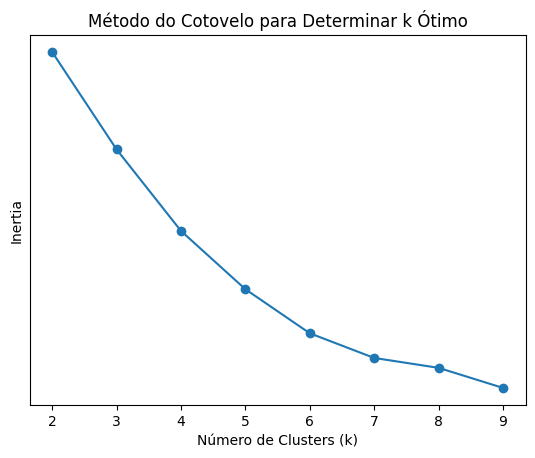

In [299]:
# @title Inertias
inertias = []
ks = range(2,10)
for k in ks:
  km = KMeans(n_clusters=k, n_init=10)
  km.fit(X)
  inertias.append(km.inertia_)

plt.figure()
plt.plot(ks, inertias, marker='o')
plt.title('Método do Cotovelo para Determinar k Ótimo')
plt.xlabel('Número de Clusters (k)')
plt.grid(False)
plt.ylabel('Inertia')
plt.yticks([])
#savefig = plt.savefig('cotovelo.png', dpi=300)
plt.show()


**Análises para alguns modelos selecionados**

Uma tabela apenas para consulta aos valores. Valores escolhidos com base na elbow curve.

Inertias (WSS) | Shiloutte | Valor K  |
---| --- | ---|
1962| 0.31|3 |
1669|0.36 |4 |
1459|0.33 |5 |
1300 | 0.41 |6 |
 1211|0.41|7 |




---


**N° de clusters = 6**



---


 Após a análise da curva do cotovelo e das métricas acima, optou-se por considerar como k = 6 o número ótimo de clusters. Desse modo, o trabalho contará com dois modelos, um padrão com k = 6 e outro com uso da análise de componente principal para k = 6. A intenção deste último modelo é apresentar uma representação gráfica e intuitiva do estudo, além de simplificar a análise considernado apenas 2 variáveis.





Uma pequena explicação da Shilouette
_____________________________________
**Pontuação de Silhueta (Silhouette Score):**

A Pontuação de Silhueta mede o quão similar um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). Os valores variam de -1 a +1, onde:
*   Valores próximos a +1 indicam que o objeto está bem correspondido ao seu próprio cluster e mal correspondido aos clusters vizinhos.
*   Valores próximos a 0 indicam que o objeto está na fronteira entre dois clusters.
*   Valores próximos a -1 indicam que o objeto pode ter sido atribuído ao cluster errado.

# Limpando algumas variáveis temporárias

In [300]:
del wss, silhouette_scores, k_values
del enc, enc_cc
del selected_cols_cc
del itbm_encoded_cc
del colormaps, heatmap_data_CC_Pais, heatmap_data_CC_Pais_percent, heatmap_data_CC_Continente
del country_cols, total_students_per_cc, total_CCA, total_CCB, total_CCE, total_CCH
del mapeamento_cci, mapeamento_continente
del cursos, inertias, ks, k,kmeans, países, score, km, feature_cols
# Se der error é porque algumas aí já foram exlcuídas

# Parte 4 - Modelo k-means com k = 6.



In [301]:
# @title Estrutura K-Means
# Inicializando o K-Means
km_ot = KMeans(n_clusters=6, max_iter=700, algorithm="elkan", n_init=10)

# Treinando
km_ot.fit(X)

# Prevendo
labels_ot = km_ot.predict(X)

In [302]:
print(labels_ot)
centers = km_ot.cluster_centers_
print(centers)

[5 0 4 ... 0 2 5]
[[ 4.29042904e-02  1.28369537e-16  9.24092409e-02 -8.67361738e-19
   1.15511551e-01 -1.30104261e-18  5.28052805e-02  6.60066007e-03
  -1.17093835e-17  9.90099010e-03  6.60066007e-02  2.31023102e-01
   6.60066007e-03  9.90099010e-03  9.90099010e-03  4.29042904e-02
   7.59075908e-02  2.64026403e-02  9.24092409e-02  3.30033003e-03
   3.30033003e-03 -1.30104261e-18 -2.60208521e-18  3.30033003e-03
   1.05610561e-01 -2.60208521e-18  3.30033003e-03 -8.67361738e-19
   0.00000000e+00  1.00000000e+00 -1.22124533e-15 -5.82867088e-16]
 [ 1.25435540e-01  2.61324042e-02  7.83972125e-02  6.93889390e-18
   1.13240418e-01  1.74216028e-03  4.70383275e-02 -7.80625564e-18
   5.22648084e-03  1.04529617e-02  7.83972125e-02  1.24900090e-15
   3.48432056e-03 -6.24500451e-16  8.53658537e-02  9.23344948e-02
   7.83972125e-02  5.92334495e-02  7.83972125e-02  3.48432056e-03
   3.48432056e-03  1.74216028e-03 -3.90312782e-18 -1.95156391e-18
   9.75609756e-02  1.74216028e-03  1.74216028e-03  6.9686

Como demonstrou-se na saída acima, o modelo conta com 32 dimensões, algo muito complexo para ser analisado de modo "cru". Nesse sentido, optou-se por realizar o PCA, reduzindo para apenas duas dimensões.

# Parte 5 - Redução de Dimensionalidade com PCA

## Análise K-Means com apenas os dois componentes principais

Como foi visto acima, o dataset inicial continha 32 colunas, um número muito alto para ser analisado neste tipo de problema. Para contornar isso, aplicou-se uma análise de componentes principais para reduzir a dimensionalidade do problema a duas dimensões.

**O dataset alterou de X para X_pca**

In [303]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

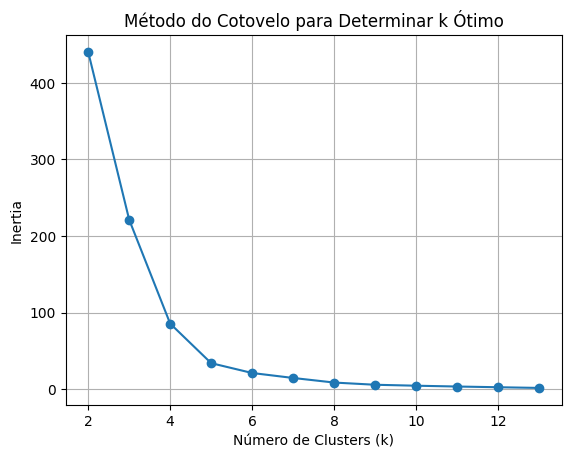

In [304]:
# @title Testes para o melhor K - Método da curva do cotovelo

inertias = []
ks = range(2,14)
for k in ks:
  k_pca = KMeans(n_clusters=k, n_init=10)
  k_pca.fit(X_pca)
  inertias.append(k_pca.inertia_)

plt.figure()
plt.plot(ks, inertias, marker='o')
plt.title('Método do Cotovelo para Determinar k Ótimo')
plt.xlabel('Número de Clusters (k)')
plt.grid(True)
plt.ylabel('Inertia')
plt.show()



O gráfico acima dá a entender que um bom valor de k seria 5 ou 6. Testar-se-á os dois.


---

Após as análises, constatou-se que o K = 6 tem uma classificaçã muito superior ao k = 5.

In [305]:
# @title Estabelecendo os dois K-Means adequados

# Inicializando os dois modelos
k5_pca = KMeans(n_clusters = 5, n_init = 10, max_iter = 1000)
k6_pca = KMeans(n_clusters = 6, n_init = 10, max_iter = 1000, random_state = 29)

# Treinando os dois modelos
k5_pca.fit(X_pca)
k6_pca.fit(X_pca)

# Prevendo
labels_k5 = k5_pca.predict(X_pca)
labels_k6 = k6_pca.predict(X_pca)

# Convertendo X_pca para DataFrame para adicionar as colunas dos clusters
X_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Adicionando os rótulos no dataset de PCA
X_pca['Cluster_k5'] = labels_k5
X_pca['Cluster_k6'] = labels_k6

In [306]:
# @title Definindo alguns parâmetros em comum para os dois plots
s1 = 65 # Tamanho dos pontos nos plots
a1 = 0.9 # Transparência
p1 = 'plasma'
c = 10
l = 8

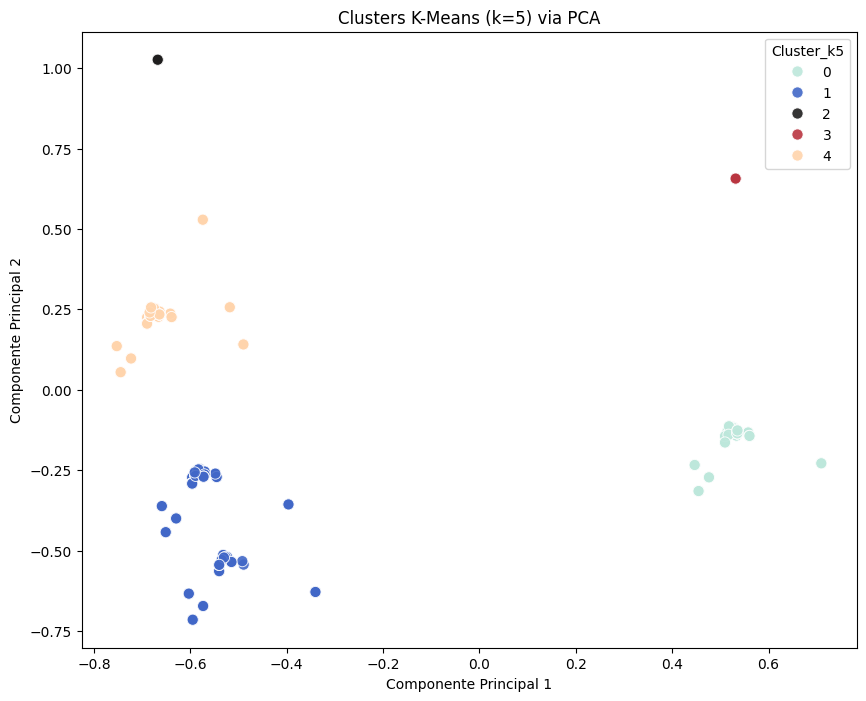

In [307]:
# @title K-Means PCA (k = 5)
# Plot 2d

plt.figure(figsize=(c,l))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster_k5',
    data= X_pca,
    palette= sns.color_palette("icefire", as_cmap=True), # Usando a paleta customizada aqui
    s=s1,
    alpha=a1,
    legend='full'
)
plt.title('Clusters K-Means (k=5) via PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(False)
plt.savefig('cluster_k5.png', dpi=300)
plt.show()

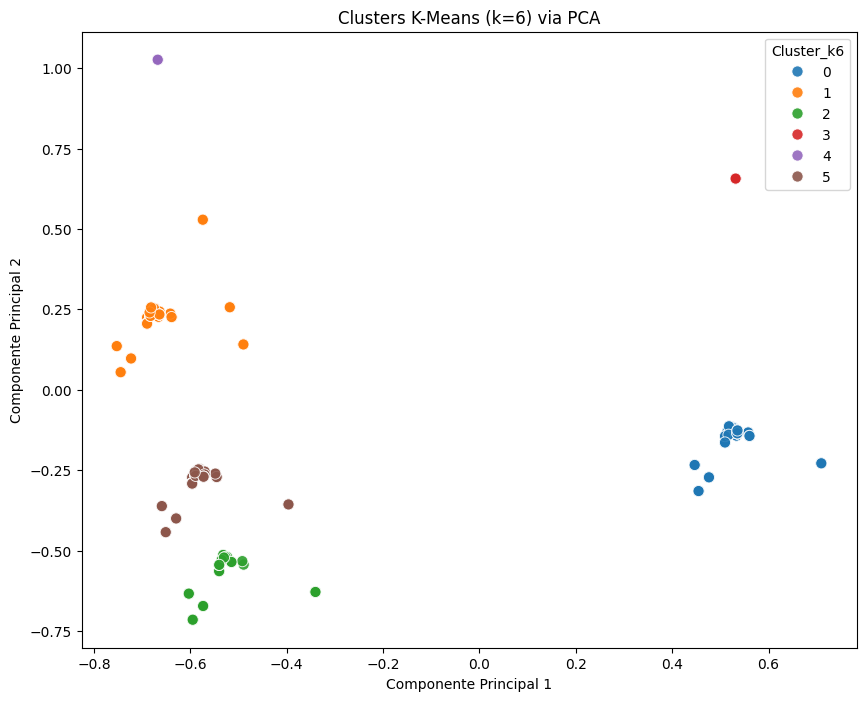

In [308]:
# @title K-Means PCA (k = 6)
# Plot 2d

plt.figure(figsize=(c,l))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster_k6',
    data=X_pca,
    palette="tab10", # Usando a paleta customizada aqui
    s=s1,
    alpha=a1,
    legend='full'
)
plt.title('Clusters K-Means (k=6) via PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(False)
plt.savefig('cluster_k6.png', dpi=300)
plt.show()

In [309]:
# Pegando os centroides
centroids_k6 = k6_pca.cluster_centers_
# Definindos os clusters
centroid_map = {i: centroid for i, centroid in enumerate(centroids_k6)}

# Mapeamento
X_pca['Centroid_PCA1'] = X_pca['Cluster_k6'].map(lambda x: centroid_map[x][0])
X_pca['Centroid_PCA2'] = X_pca['Cluster_k6'].map(lambda x: centroid_map[x][1])


X_pca.drop(columns=['Cluster_k5'], inplace=True)
#display(X_pca.head())

Foram removidos 377 outliers
Fiz dessa maneira porque percebi que os outliers tinham os maiores valores de PCA2


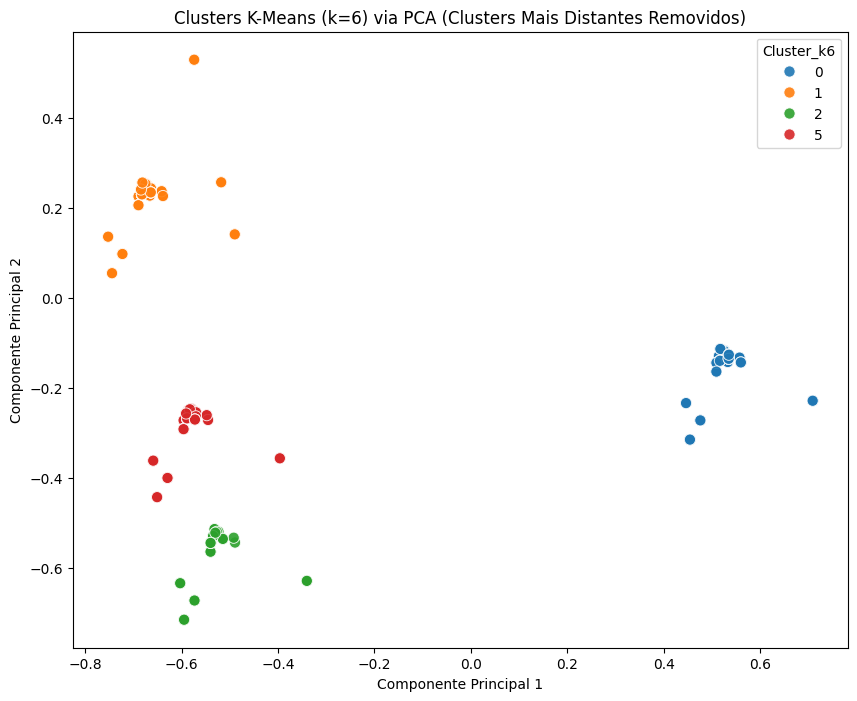

In [310]:
len_antes = len(X_pca)

for i in X_pca.Centroid_PCA2:
  if i > 0.64:
    X_pca = X_pca.drop(X_pca[X_pca.Centroid_PCA2 == i].index)
len_depois = len(X_pca)
print(f"Foram removidos {len_antes - len_depois} outliers")
print("Fiz dessa maneira porque percebi que os outliers tinham os maiores valores de PCA2")


plt.figure(figsize=(c, l))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster_k6',
    data=X_pca,
    palette="tab10",
    s=s1,
    alpha=a1,
    legend='full'
)
plt.savefig('cluster_k6_sem_outliers.pdf', dpi=300)
plt.title('Clusters K-Means (k=6) via PCA (Clusters Mais Distantes Removidos)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(False)
plt.show()



## Testando o DBSCAN

A separação do K-Means não ficou ruim, mas não custa nada tentar o DBSCAN também.

FIz inúmeras tentativas com o DBSCAN e parece que o KMeans, nesse dataset, foi muito melhor na separação. Irei prosseguir com o KMeans para a última parte do trabalho, a parte da explicabilidade com árvores de decisão.


In [311]:
# @title Um teste com o DBSCAN - Optei por deixá-lo comentado, uma vez que optei pelo K-Means
"""X_pca.drop(["Cluster_k5", "Cluster_k6"], axis = 1, inplace= True)

dbs = DBSCAN(eps=0.17, min_samples=30)
dbs.fit(X_pca)

dbs_labels = dbs.labels_


X_pca["labels DBSCAN"] = dbs_labels

plt.figure(figsize=(c,l))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='labels DBSCAN',
    data=X_pca,
    palette="tab10", # Usando a paleta customizada aqui
    s=s1,
    alpha=a1,
    legend='full'
)
plt.title('Clusters DBSCAN via PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()
"""

'X_pca.drop(["Cluster_k5", "Cluster_k6"], axis = 1, inplace= True)\n\ndbs = DBSCAN(eps=0.17, min_samples=30)\ndbs.fit(X_pca)\n\ndbs_labels = dbs.labels_\n\n\nX_pca["labels DBSCAN"] = dbs_labels\n\nplt.figure(figsize=(c,l))\nsns.scatterplot(\n    x=\'PCA1\',\n    y=\'PCA2\',\n    hue=\'labels DBSCAN\',\n    data=X_pca,\n    palette="tab10", # Usando a paleta customizada aqui\n    s=s1,\n    alpha=a1,\n    legend=\'full\'\n)\nplt.title(\'Clusters DBSCAN via PCA\')\nplt.xlabel(\'Componente Principal 1\')\nplt.ylabel(\'Componente Principal 2\')\nplt.grid(True)\nplt.show()\n'

# Parte 6 - O que o modelo quer nos dizer?

Irei treinar uma Árvore de Decisão (classificação) usando o `PCA1` e `PCA2` do dataset `X_pca` com `Cluster_k6` sendo a variável alvo. Em seguida, devo plotar a árvore e avaliar como ela se comporta.


---
Nesta parte debaixo relato algumas observações que constatei após algumas modificações no algoritmo da decision tree.

Vi que para um min_samples_leaf baixo, a acurácia é de 100%, um resultado almejado, mas que pode ser ocasionado por overfitting. Com isso mente, aumentei esse parâmetro e vi que a acurácia reduziu. Parece que estava realmente sofrendo com overfitting. Pelo gráfico do K-Means dava para ver que dois grupos possuíam apenas uma observação (outliers), tenho que ver como irei lidar com eles.



Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00        66
           5       1.00      1.00      1.00        74

    accuracy                           1.00       468
   macro avg       1.00      1.00      1.00       468
weighted avg       1.00      1.00      1.00       468



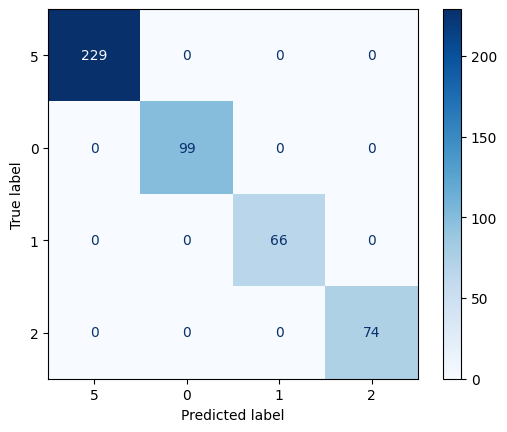

In [312]:
# @title Utilizando o Classificador
# Irei separar em teste e treino para ver se a árvore consegue explicar pelo menos alguma coisa do problema de pesquisa.

# Divisão em teste e treino
X_treino, X_teste, y_treino, y_teste = train_test_split(X_pca[['PCA1','PCA2']], X_pca['Cluster_k6'], test_size=0.3, random_state= 29)

# Treinamento
# Como temos 1559 observações e 4 classes : 1559 / 4 =~ 389
tree = DecisionTreeClassifier(max_depth= 8, criterion = "entropy", splitter = "best", random_state = 29).fit(X_treino, y_treino)

# Previsão
tree_pred = tree.predict(X_teste)

# Acurácia e Matriz de confusão
acc = accuracy_score(y_teste, tree_pred)
matriz_de_confusao = confusion_matrix(y_teste, tree_pred)
print(f"Acurácia: {acc}")

class_names = X_pca.Cluster_k6.unique()
disp = ConfusionMatrixDisplay.from_estimator(tree, X_teste, y_teste,
        display_labels=class_names,
        cmap=plt.cm.Blues)

##plt.savefig('matriz_de_confusao.pdf', dpi=300)

rel = classification_report(y_teste, tree_pred)
print(rel)

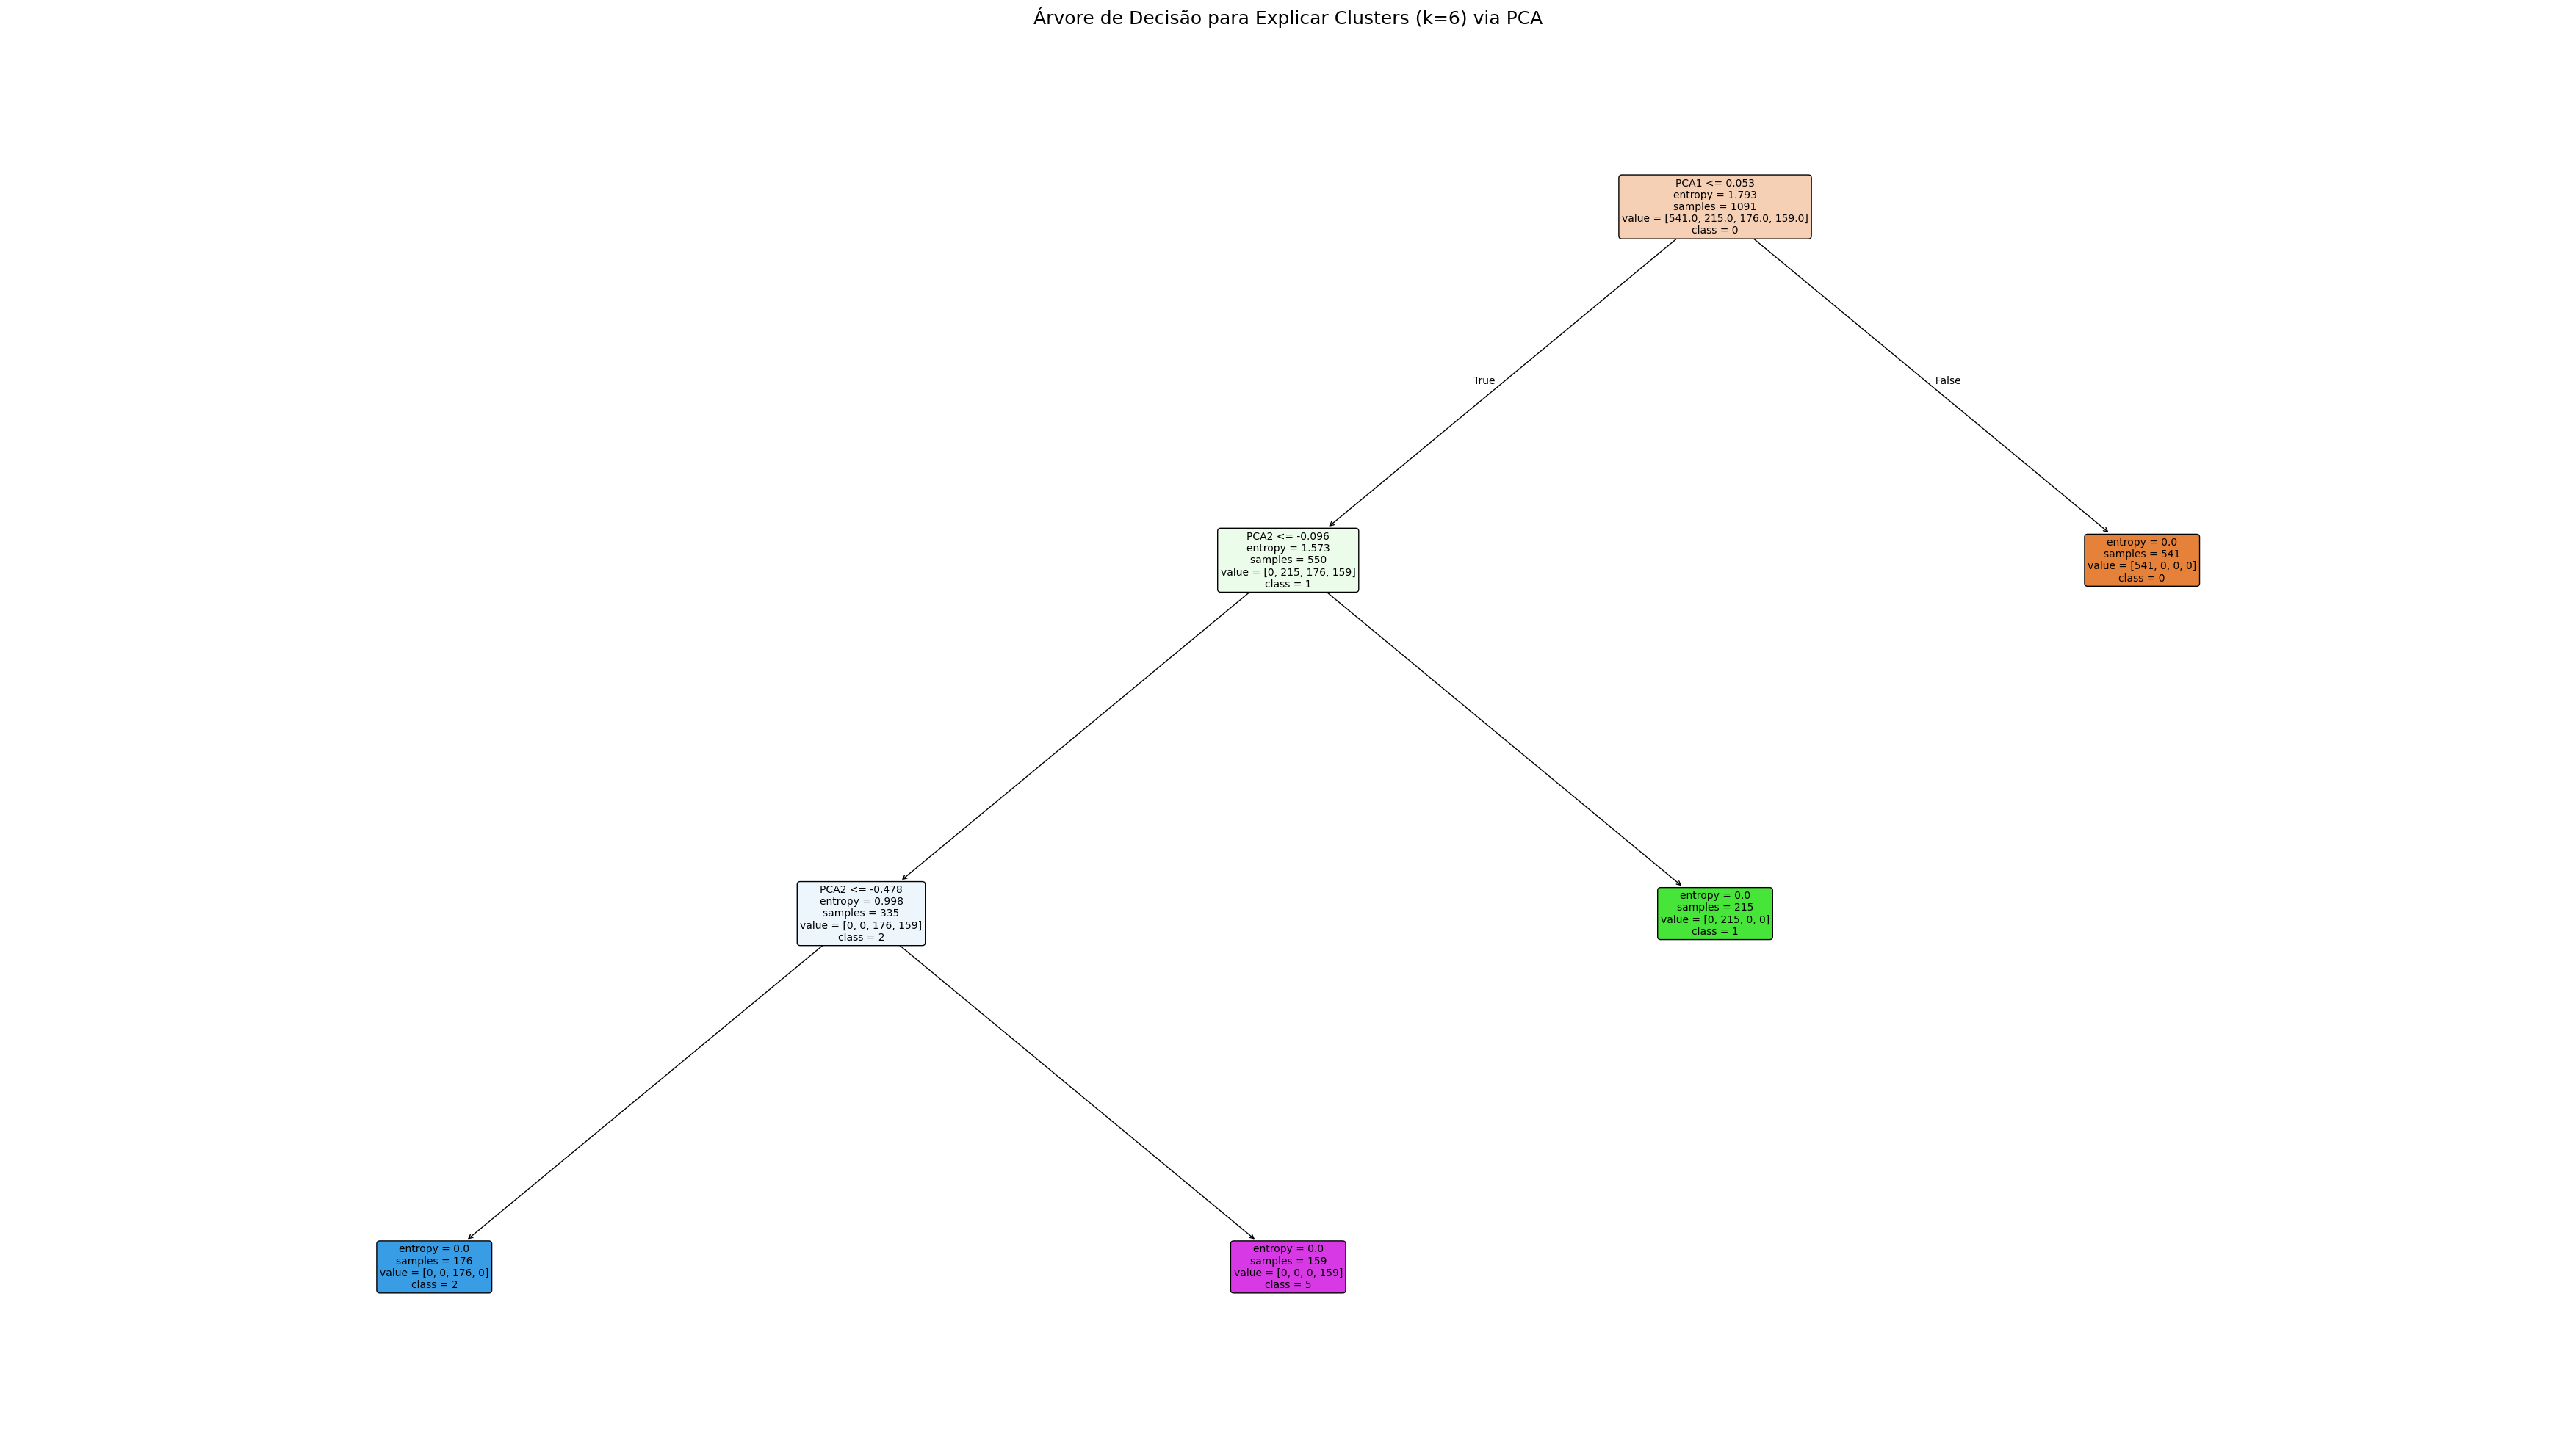

In [313]:

# Figura
plt.figure(figsize=(45, 25))
plot_tree(tree, feature_names=['PCA1', 'PCA2'],
          class_names=[str(c) for c in sorted(X_pca['Cluster_k6'].unique())],
          filled=True,
          rounded=True,
          fontsize=10
)
plt.title('Árvore de Decisão para Explicar Clusters (k=6) via PCA', fontsize=18)
#plt.savefig('arvore_de_decisao_trabalho.png', dpi=300)
plt.show()

### Métricas de Avaliação para a Árvore de Decisão

1.  **Matriz de Confusão**: Mostra o número de previsões corretas e incorretas para cada cluster.
2.  **Relatório de Classificação**: Inclui algumas métricas como:
    *   **Acurácia (Accuracy)**: A proporção de previsões corretas em relação ao total.
    *   **Precisão (Precision)**: A proporção de verdadeiros positivos em relação a todos os resultados positivos previstos. É útil quando o custo de um falso positivo é alto.
    *   **Recall (Sensibilidade)**: A proporção de verdadeiros positivos em relação a todos os casos positivos reais. É útil quando o custo de um falso negativo é alto.
    *   **F1-Score**: Uma média harmônica da precisão e do recall, útil quando é necessário um equilíbrio entre ambos.

3.  **Importância das Features**: A árvore de decisão pode nos dizer quais características (neste caso, `PCA1` e `PCA2`) foram mais importantes para separar os clusters. Isso pode ajudar a entender quais dimensões do PCA são mais relevantes para a formação dos grupos.

4.  **Visualização da Árvore**: A própria visualização pode ser uma ferramenta para entender como a árvore toma as decisões, ou seja, quais são os 'caminhos' para cada cluster.



## Explicação do modelo

Agora que temos a árvore, é preciso identificar quais variávies estão no PCA e como elas se relacionam.





In [314]:
# @title Desvendando os PCA's

pca_components = pca.components_
feature_names = X.columns

loadings_df = pd.DataFrame(
    pca_components.T, # Transpor para ter as features nas linhas e PCs nas colunas
    columns=['PCA1', 'PCA2'],
    index=feature_names
)

n = 4 # Usando a variável 'n'para siplificar

print(f" Top {n} features com maiores loadings POSITIVOS para PCA1:")
print(loadings_df['PCA1'].nlargest(n))

print(f" Top {n} features com maiores loadings NEGATIVOS para PCA1:")
print(loadings_df['PCA1'].nsmallest(n))

print(f" Top {n} features com maiores loadings POSITIVOS para PCA2:")
print(loadings_df['PCA2'].nlargest(n))

print(f" Top {n} features com maiores loadings NEGATIVOS para PCA2:")
print(loadings_df['PCA2'].nsmallest(n))

 Top 4 features com maiores loadings POSITIVOS para PCA1:
CC_CCE           0.838632
Pais_França      0.183352
Pais_Alemanha    0.034315
Pais_Holanda     0.031584
Name: PCA1, dtype: float64
 Top 4 features com maiores loadings NEGATIVOS para PCA1:
CC_CCA         -0.360567
CC_CCB         -0.267028
CC_CCH         -0.211037
Pais_Espanha   -0.079435
Name: PCA1, dtype: float64
 Top 4 features com maiores loadings POSITIVOS para PCA2:
Pais_Estados Unidos    0.774472
CC_CCA                 0.409089
CC_CCE                 0.039580
Pais_Argentina         0.004358
Name: PCA2, dtype: float64
 Top 4 features com maiores loadings NEGATIVOS para PCA2:
CC_CCH          -0.360421
Pais_Portugal   -0.196941
Pais_Brasil     -0.154263
Pais_Espanha    -0.115865
Name: PCA2, dtype: float64


Explained Variance Ratio for each Principal Component:
PC1: 0.2266
PC2: 0.1445


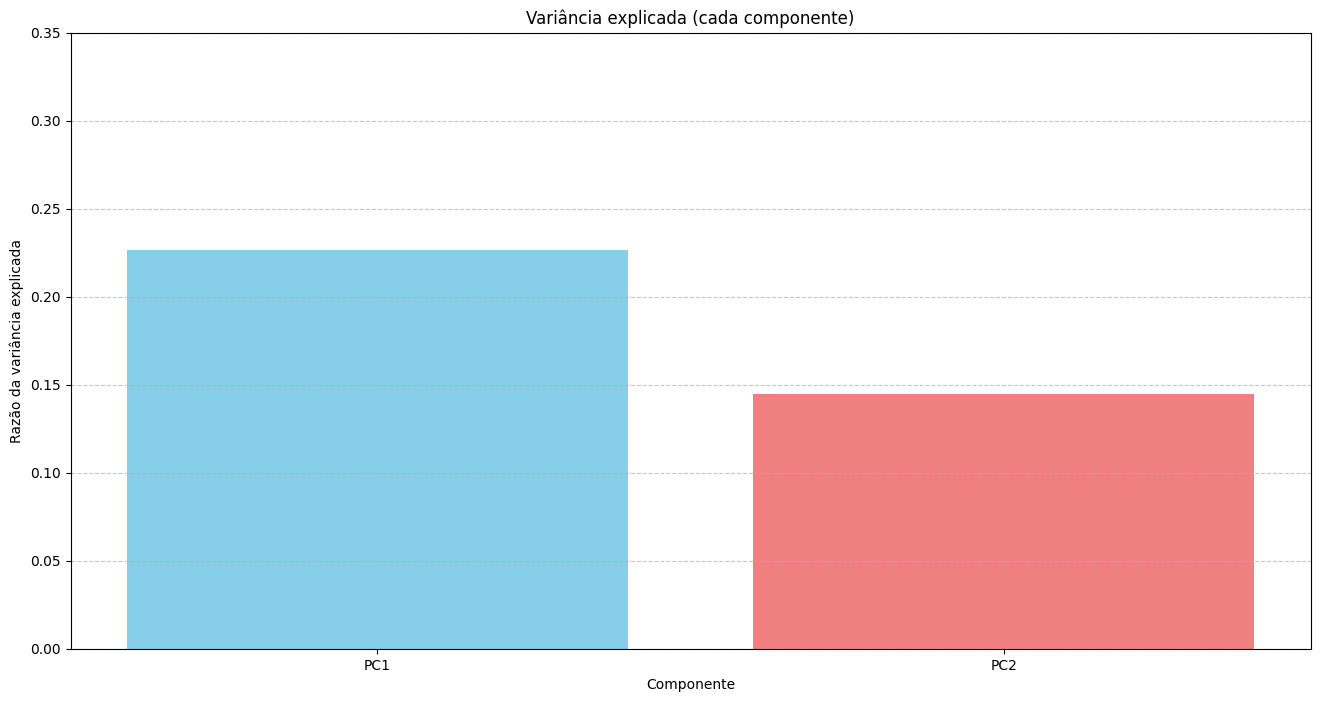

In [315]:
# @title Variância explicada
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

plt.figure(figsize=(16, 8))
components = [f'PC{i+1}' for i in range(len(explained_variance_ratio))]
plt.bar(components, explained_variance_ratio, color=['skyblue', 'lightcoral'])
plt.title('Variância explicada (cada componente)')
plt.xlabel('Componente')
plt.ylabel('Razão da variância explicada')
plt.ylim(0, 0.35)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.savefig('explained_variance_ratio.pdf', dpi=300)
plt.show()


## Analisando o a composição dos PCA's, o scatter plot, a Árvore e a Razão da Variância explicada


---
**Uma pequena consideração inicial**

Os clusters gerados foram [0, 1, 2, 5], lembrem-se que utilizei K= 6 e removi os outliers, sobrando apenas 4 clusters. Como defini um random_state, os grupos que aparecerem aí devem ser os mesmos que esses explicitados logo acima.


---

Em primerio lugar é preciso avaliar o que cada um dos dois PCA's representam. Na saída de uma das células acima (já na última parte do código), é possível ver os n atributos mais preponderantes em cada PCA. Utilizando n = 4 podemos perceber que o PCA1 está positivamente relacionado com o CCE e países da Europa Central, como Holanda, França e Alemanha, e negativamente relacionado com os outros 3 centros. Isto é, o PCA1 reflete indistintamente o Centro de Ciências Exatas. Note que os outros Centros não estão apenas relacionados negativamente com o PCA 1, eles são OS TRÊS ITENS MAIS NEGATIVAMENTE RELACIONADOS.

Já o PCA2 representa muito fortemente os Estados Unidos e o Centro de Ciências Agrárias (mostrando que os alunos do CCA tem feito mais intercâmbios para os EUA), além de explicar uma pequena parcela do CCE (ou seja, o CCE está positivamente relacionado com a Europa Central e os Estados Unidos, este em menor medida). Já pelo lado negativo, o PCA2 é composto pelo CCH, Portugal, Brasil e Espanha.

Pelo demonstrado até aqui, parece que as maiores (e melhores) oportunidades de intercâmbio são conferidas aos alunos do CCE e do CCA.

Em relação a Árvore de Decisão, podemos ver que a primeira variável analisada é o PCA1 com uma "pergunta" se ele é menor do que 0.53. Pelo que vimos acima, isso provavelmente indica um aluno que não é do CCE ou que não viajou para a Europa Central. Se o aluno ter um PCA1 maior que 0.53 ele é classificado como `0`, que por sinal, é o cluster mais à direita no scatter plot (para esclarecer: eixo x: PCA1 e eixo y: PCA2).

Seguindo para o próximo nó da árvore, temos a seguinte pergunta: "PCA2 < -0.096", indicando, provavelmente, um indivíduo que é do CCH ou viajou para alguns dos países explicitados acima, podendo ser ambos também.Se essa condição não for satisfeita (e o indivíduo tiver um PCA2 > -0.096), ele é classificado como `1`. Este o cluster com o centroide de PCA2 mais elevado.

O terceiro e último nó, mostra uma classificação do tipo: "PCA2 < - 0.478". Se ela for falsa para o indivíduo i, ele é classificado como `5`. Se for verdade, é classificado como `2.`

Note que o PCA2 divide os clusters com base em sua magnitude, se PCA2 for muito alto, é `1`. Se for baixo, mas não tão baixo, `5` e se for extremamente baixo, `2`.

Podemos dizer que o cluster `0` representa os indivíduos do CCE e o cluster `1`, alunos do CCA. Obviamente, isso é uma generalização, nada impede de que um ou outro aluno de fora do CCE esteja no cluster `0`, o mesmo é válido para o CCA.

Por último, pelo diagrama da variância explicada, vemos que o PCA1 explica mais variações do que o PCA2, a diferença é cerca de 8 pontos percentuais.
